# Lab: Joining and Analyzing Movie and Review Data

## Tasks

### 1. Data Prepararion and Explorations

- Load the movies.csv and reviews.csv datasets into pandas dataframes.
- Display summary statistics and the first few rows of each dataframe to
understand their structure.

first, import pandas and load csv.

In [1]:
import pandas as pd

movies = pd.read_csv('movies.csv')
reviews = pd.read_csv('reviews.csv')

Display about movies.

In [2]:
print(movies.describe())
print(movies.head())

         movie_id  release_year
count  100.000000    100.000000
mean    50.500000   2001.670000
std     29.011492     13.758417
min      1.000000   1980.000000
25%     25.750000   1988.000000
50%     50.500000   2001.500000
75%     75.250000   2014.250000
max    100.000000   2023.000000
   movie_id                     title   genre  release_year
0         1  The Shawshank Redemption   Drama          1999
1         2             The Godfather   Drama          1987
2         3           The Dark Knight   Drama          1993
3         4          Schindler's List   Crime          2002
4         5              Pulp Fiction  Action          1980


Display about reviews

In [3]:
print(reviews.describe())
print(reviews.head())

        review_id   movie_id      rating
count  300.000000  300.00000  300.000000
mean   150.500000   52.99000    5.328333
std     86.746758   27.98835    2.580354
min      1.000000    1.00000    1.000000
25%     75.750000   29.75000    3.000000
50%    150.500000   54.00000    5.200000
75%    225.250000   76.25000    7.400000
max    300.000000  100.00000   10.000000
   review_id  movie_id      reviewer  rating review_date
0          1        96      Jane Doe     8.0  2020-02-17
1          2        90  Victor Scott     1.8  2020-08-22
2          3        32    Yara Baker     1.8  2020-03-10
3          4        77  Victor Scott     5.2  2020-04-24
4          5        16  Mia Martinez     6.3  2020-04-13


### 2. Highest Rated Movies

- Perform an inner join on the `movies` and reviews dataframes based on the `movie_id` column.
- Calculate the average rating for each movie.
- Identify the top 10 highest-rated movies.
- Display the titles and average ratings of these top 10 movies.

Merge movies and reviews on `movie_id`.

In [4]:
merged_dataset = pd.merge(movies, reviews, on='movie_id')

Calculate average rating for each movie, sort them, and display top10.

In [5]:
print(merged_dataset.groupby('title')['rating'].mean().sort_values(ascending=False).head(10))

title
The Dark Knight            9.800
Vertigo                    9.350
City Lights                9.250
Jaws                       8.600
Scarface                   8.000
Grave of the Fireflies     8.000
The Empire Strikes Back    8.000
North by Northwest         7.650
A Beautiful Mind           7.625
Oldboy                     7.500
Name: rating, dtype: float64


### 3. Genre Analysis

- Group the joined dataframe by genre and calculate the average rating for each genre.
- Determine which genre has the highest average rating.
- Display the genres along with their average ratings.

In [6]:
print(merged_dataset.groupby('genre')['rating'].mean().sort_values(ascending=False))

genre
Sci-Fi       6.118421
Fantasy      5.768421
Biography    5.279310
Drama        5.204478
Action       5.109375
Crime        4.901493
Name: rating, dtype: float64


### 4. Reviewer Analysis

- Identify the top 5 reviewers who have given the most reviews.
- Calculate the average rating given by each of these top 5 reviewers.
- Display the reviewer names and their average ratings.

In [7]:
tmp = reviews['reviewer'].value_counts().sort_values(ascending=False).head(5)
tmp = merged_dataset[merged_dataset['reviewer'].isin(tmp.index)].groupby('reviewer')['rating'].agg(['mean', 'count'])
print(tmp)

                  mean  count
reviewer                     
Henry Harris  4.473333     15
John Smith    4.542857     14
Ryan Hall     7.030769     13
Tom Young     5.400000     18
Uma King      5.500000     16


### 5. Time-Based Analysis

- Analyze how movie ratings have changed over time.
- Group the joined dataframe by the month extracted from the review_date column and calculate the average rating for each month.
- Create a line plot showing the trend of average movie ratings over time.
- Discuss any observable trends.

Add coulum `review_month`.

In [8]:
merged_dataset['review_month'] = pd.to_datetime(merged_dataset['review_date']).dt.month

Make graph with x=review_month, y=average rating.

<Axes: xlabel='review_month'>

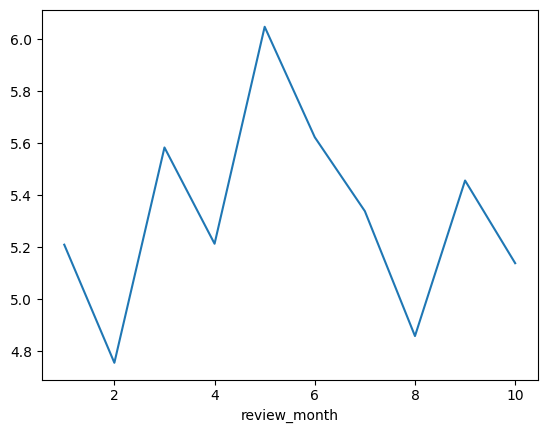

In [9]:
merged_dataset.groupby('review_month')['rating'].mean().plot()

As you can see movies tend to get higher rating in May so I looked into reason.  
First, I expected partical reviewr who tends to rate high rated a lot in May.  
if person like that rate review a lot in May, movies can get high rate in May. opposite as well.

In [10]:
for ascending in (True, False):
    tmp = reviews.groupby('reviewer')['rating'].mean().sort_values(ascending=ascending).head(5)
    tmp = merged_dataset[merged_dataset['reviewer'].isin(tmp.index)].groupby('review_month')['rating'].count()
    print(tmp)

print(merged_dataset.groupby('review_month')['rating'].count())

review_month
1     7
2     7
3     5
4     7
5     6
6     5
7     4
8     5
9     3
10    8
Name: rating, dtype: int64
review_month
1     5
2     8
3     7
4     5
5     4
6     5
7     7
8     6
9     3
10    8
Name: rating, dtype: int64
review_month
1     31
2     29
3     31
4     30
5     31
6     30
7     31
8     31
9     30
10    26
Name: rating, dtype: int64


But there is no fact like that.  
People who tend to rate higher don't tend to rate a lot in May.  
People who tend to rate lower don't tend to rate a lot in not May.  
And also, Almost same number of rating are performed each month.

### 6. Movies with Most Reviews

- Identify the top 10 movies that have received the most reviews.
- Display the titles of these movies along with the number of reviews they have received.

In [11]:
print(merged_dataset.groupby('title')['rating'].count().sort_values(ascending=False).head(10))

title
Full Metal Jacket        7
Interstellar             7
The Truman Show          6
Capernaum                6
Paths of Glory           6
Memento                  6
It's a Wonderful Life    6
Shutter Island           6
The Revenant             6
The Dark Knight Rises    5
Name: rating, dtype: int64


### 7. Distribution of Ratings

- Create a histogram to visualize the distribution of ratings.
- Analyze the distribution and discuss any skewness or patterns observed in the ratings.

movie_id
3     9.800
62    9.350
67    9.250
85    8.600
41    8.000
12    8.000
84    8.000
63    7.650
80    7.625
37    7.500
Name: rating, dtype: float64


<Axes: >

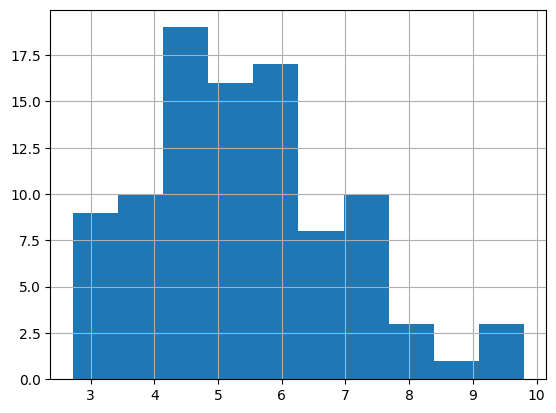

In [12]:
print(merged_dataset.groupby('movie_id')['rating'].mean().sort_values(ascending=False).head(10))
merged_dataset.groupby('movie_id')['rating'].mean().hist()

Most of the moviews get 4-6 rating. only few moviews get 9 and more rating.

### 8. Impact of Release Year

- Analyze if there is any correlation between the release year of a movie and its average rating.
- Create a scatter plot showing the relationship between the release year and the average rating.
- Discuss any observable patterns or correlations.

<Axes: xlabel='release_year', ylabel='rating'>

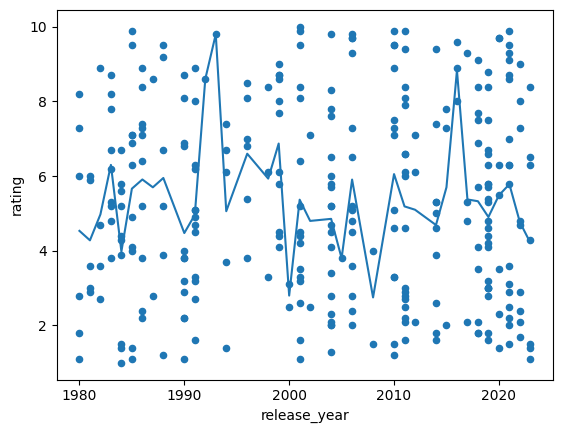

In [13]:
merged_dataset.plot(x='release_year', y='rating', kind='scatter')
merged_dataset.groupby('release_year')['rating'].mean().plot()

there is no correlation between the release year of a movie and its average rating.

### 9. Reviewer Consistency

- For each reviewer, calculate the standard deviation of their ratings.
- Identify the most and least consistent reviewers based on the standard deviation of their ratings.
- Display the names of these reviewers along with their standard deviations.

In [14]:
tmp = merged_dataset.groupby('reviewer')['rating'].std().sort_values(ascending=False)
tmp = tmp.reset_index()
print(tmp.iloc[0], '\n\n', tmp.iloc[-1])

reviewer    Zane Carter
rating         3.567718
Name: 0, dtype: object 

 reviewer    Noah Robinson
rating           1.773415
Name: 26, dtype: object


### 10. Challenge Task - Genre Popularity Over Time

- Analyze how the popularity of different genres has changed over time.
- Group the joined dataframe by `genre` and the year extracted from the `review_date` column.
- Calculate the number of reviews for each genre per year.
- Create a line plot for each genre showing the number of reviews over time.
- Discuss any trends or shifts in genre popularity over the years.

genre   release_year
Action  1980             2
        1984             6
        1985             4
        1988             4
        2006            10
                        ..
Sci-Fi  2015             3
        2016             1
        2017             2
        2021             6
        2023             1
Name: rating, Length: 77, dtype: int64


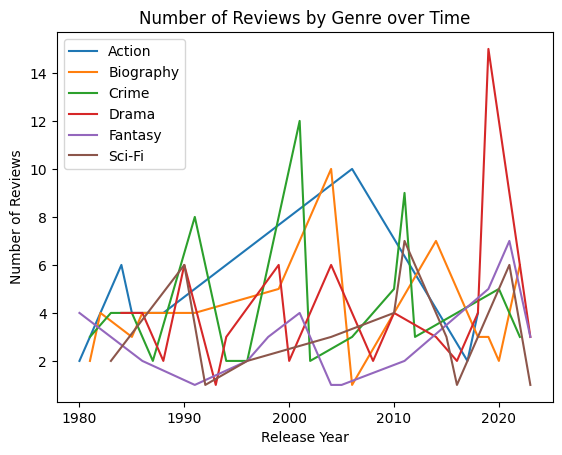

In [15]:
import matplotlib.pyplot as plt

genre_reviews_per_year = merged_dataset.groupby(['genre', 'release_year'])['rating'].count()
print(genre_reviews_per_year)

# Group the genre_reviews_per_year series by genre
genre_reviews_per_year_grouped = genre_reviews_per_year.groupby('genre')

# Plot the line plot for each genre
for genre, data in genre_reviews_per_year_grouped:
    plt.plot(data.index.get_level_values('release_year'), data.values, label=genre)

plt.xlabel('Release Year')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews by Genre over Time')
plt.legend()

plt.show()

- Fantasy and Sci-Fi keep getting low number of reviews
- Every few years, Crime get more reviews
- Number of Drama review incresed rapidly in 2020